In [1]:
import matplotlib.pyplot as plt
import torch
from mnist import MNIST
import numpy as np

In [2]:
mndata = MNIST('./mnist_dataset/')
mndata.gz = True
mnist_x_train, mnist_y_train = mndata.load_training()
mnist_x_test, mnist_y_test = mndata.load_testing()
x_train = torch.tensor(list(mnist_x_train), dtype=float)
x_test = torch.tensor(list(mnist_x_test), dtype=float)
y_train = torch.tensor(list(mnist_y_train), dtype=float)
y_test = torch.tensor(list(mnist_y_test), dtype=float)

In [3]:
rng = np.random.default_rng(seed=1)

In [4]:
# Scale down pixels from 0-255 to 0-1
x_train = x_train / 255
x_test = x_test / 255

# OneHot label vectors
def onehot(vector):
    tmp = []
    for scalar in vector.data:
        tmp2 = [1 if i==scalar else 0 for i in range(10)]
        tmp.append(tmp2)
    return torch.tensor(tmp)
y_train = onehot(y_train)
y_test = onehot(y_test)

print(f'x_train={x_train.shape}, y_train={y_train.shape}')
print(f'x_test={x_test.shape}, y_test={y_test.shape}')


x_train=torch.Size([60000, 784]), y_train=torch.Size([60000, 10])
x_test=torch.Size([10000, 784]), y_test=torch.Size([10000, 10])


In [5]:
x_train.dtype

torch.float64

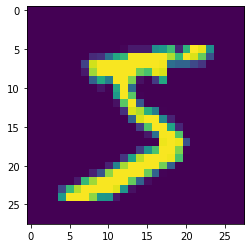

In [6]:
# Visualize X
img = np.array(x_train[0].tolist())
plt.imshow(img.reshape(28, 28))
plt.show()

In [7]:
# Multinomial sampling with replacement
def draw_batch(batch_size): 
    draw = lambda: int(rng.random() * x_train.shape[0])
    batch = [draw() for _ in range(batch_size)]
    return x_train[batch], y_train[batch]

In [8]:
def mle(x, y):
    maximum_likelihood = (x*y).sum(axis=1)
    nll = maximum_likelihood.log() * -1
    return nll.sum() / len(nll.data)

In [9]:
rng = np.random.default_rng(seed=5)
l1_w = torch.tensor(rng.normal(size=(784, 500)), requires_grad=True)
l1_b = torch.tensor(rng.normal(size=(500,)), requires_grad=True)
l2_w = torch.tensor(rng.normal(size=(500, 10)), requires_grad=True)
parameters = [l1_w, l1_b, l2_w]
losses = []

In [10]:
def forward(x):
    x = l1_b + (x@l1_w)
    x = x.tanh()

    x = x@l2_w
    x = x.exp()
    return x / x.sum(axis=x.dim()-1).reshape((-1, 1))

In [14]:
rng = np.random.default_rng(seed=1)
epochs = 10
batch_size = 5
lr = 0.1
for e in range(epochs):
    x, y = draw_batch(batch_size)
    out = forward(x)

    loss = mle(out, y)
    avg = loss.data.sum().item()

    loss.backward()

    for p in parameters:
        p.data -= lr * p.grad
        p.grad = None

    losses.append(avg)
    print(f'Epoch {e}: {avg}')

Epoch 0: 3.9479853136896175
Epoch 1: 8.791837415475893
Epoch 2: 3.7404080492733423
Epoch 3: 6.177365815863431
Epoch 4: 1.8089995621342634
Epoch 5: 1.2750049134733855e-05
Epoch 6: 0.9310799240377481
Epoch 7: 2.5081880086989273e-07
Epoch 8: 0.005180511256755429
Epoch 9: 12.245560840880284


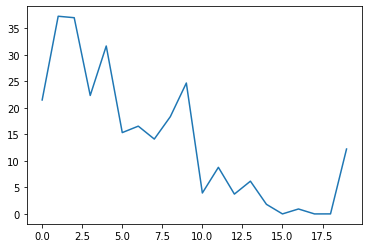

In [15]:
plt.plot(losses)
plt.show()

In [16]:
correct = 0
for i in range(len(x_test.data)):
    y = y_test[i]
    x = forward(x_test[i])
    corr = np.argmax(y.data)
    predicted = np.argmax(x.data)
    if predicted == corr: correct += 1

print(f'Test accuracy: {(correct/len(x_test.data))*100}%')

Test accuracy: 30.070000000000004%
